In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import *
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
result_root_path = '/nas/home/cborrelli/bot_speech/results/closed_set_multiclass_train_dev'


In [11]:
def my_plot_confusion_matrix(cm, x_labels, y_labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    from matplotlib import rcParams
    rcParams['font.family'] = 'serif'
    rcParams['text.usetex'] = 'true'
    rcParams['font.size'] = 28 
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    
    cm[cm < 0.01] = 0
    
    fig, ax = plt.subplots(figsize=(12,12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap, clim=(0,1))
    ax.figure.colorbar(im, ax=ax, shrink=0.7)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=x_labels, yticklabels=y_labels,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if cm[i, j] > 0.01:
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [12]:
nfft_list = [512, 256, 128]
hop_size_list = [256, 128, 64]
selected_features_list = [['lpc', 'bicoh'],['bicoh'],['lpc']]

number_lpc_order = 49
stop_lpc_order = 50
normalizers_keys = ["minmax", "zscore", "l2"]
classifiers_keys = ["svm", "rf"]


In [13]:
results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 'number_lpc_order', 'stop_lpc_order', 
                                   'normalization', 'classifier', 
                                   'accuracy_train', 'accuracy_dev','accuracy_eval',
                                   'cm_train','cm_dev','cm_eval',
                                   'model_params' ])
for selected_features in selected_features_list:
    for fft_params in zip(nfft_list, hop_size_list):
        nfft = fft_params[0]
        hop_size = fft_params[1]
        for c in classifiers_keys:
            for n in normalizers_keys:
                result_name = "class_{}_norm_{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                        c, n, nfft, hop_size,
                        number_lpc_order,
                        stop_lpc_order)

                result_name = result_name + "_selected_features_" + "-".join(
                    s for s in selected_features) + ".npy"

                result_filename = os.path.join(result_root_path, result_name)

                if os.path.exists(result_filename):
                    result_dict = pickle.load(open(result_filename, "rb" ))
                    cm_train = confusion_matrix(result_dict['y_train'], result_dict['y_predict_train'],
                                               normalize='true')
                    cm_dev = confusion_matrix(result_dict['y_dev'], result_dict['y_predict_dev'],
                                             normalize='true')
                    cm_eval = confusion_matrix(result_dict['y_eval'], result_dict['y_predict_eval'],
                                              normalize='true')

                    acc_train = balanced_accuracy_score(result_dict['y_train'], result_dict['y_predict_train'])
                    acc_dev = balanced_accuracy_score(result_dict['y_dev'], result_dict['y_predict_dev'])
                    acc_eval = balanced_accuracy_score(result_dict['y_eval'], result_dict['y_predict_eval'])


                    results_df.loc[len(results_df.index)] = [nfft, hop_size, selected_features, 
                                                           number_lpc_order, stop_lpc_order,
                                                           n, c, 
                                                           acc_train, acc_dev, acc_eval,
                                                           cm_train, cm_dev, cm_eval, result_dict['best_model']]



In [14]:
results_df

,nfft,hop_size,selected_features,number_lpc_order,stop_lpc_order,normalization,classifier,accuracy_train,accuracy_dev,accuracy_eval,cm_train,cm_dev,cm_eval,model_params
0,512,256,"[lpc, bicoh]",49,50,minmax,svm,0.965632,0.949305,0.920715,"[[0.9276663146779303, 0.0026399155227032735, 0...","[[0.8990384615384616, 0.004807692307692308, 0....","[[0.8291270169631775, 0.012825817128671908, 0....","{'class__C': 10, 'class__decision_function_sha..."
1,512,256,"[lpc, bicoh]",49,50,zscore,svm,0.978188,0.952874,0.929589,"[[0.9508975712777191, 0.0010559662090813093, 0...","[[0.9038461538461539, 0.003205128205128205, 0....","[[0.8518824989656599, 0.01075713694662805, 0.0...","{'class__C': 1, 'class__decision_function_shap..."
2,256,128,"[lpc, bicoh]",49,50,minmax,svm,0.966348,0.949016,0.922398,"[[0.9271383315733897, 0.0015839493136219642, 0...","[[0.8878205128205128, 0.004807692307692308, 0....","[[0.8316094331816302, 0.011584609019445594, 0....","{'class__C': 10, 'class__decision_function_sha..."
3,256,128,"[lpc, bicoh]",49,50,zscore,svm,0.959019,0.944969,0.921770,"[[0.914466737064414, 0.004751847940865892, 0.0...","[[0.8846153846153846, 0.004807692307692308, 0....","[[0.8307819611088125, 0.012412081092263137, 0....","{'class__C': 0.1, 'class__decision_function_sh..."
4,128,64,"[lpc, bicoh]",49,50,minmax,svm,0.966917,0.944055,0.922793,"[[0.928194297782471, 0.0015839493136219642, 0....","[[0.875, 0.009615384615384616, 0.0, 0.0, 0.083...","[[0.8311956971452213, 0.015721969383533305, 0....","{'class__C': 10, 'class__decision_function_sha..."
5,128,64,"[lpc, bicoh]",49,50,zscore,svm,0.978382,0.954300,0.928242,"[[0.9466737064413939, 0.0015839493136219642, 0...","[[0.9022435897435898, 0.003205128205128205, 0....","[[0.8415390980554406, 0.012412081092263137, 0....","{'class__C': 1, 'class__decision_function_shap..."
6,512,256,[bicoh],49,50,minmax,svm,0.594289,0.583927,0.530788,"[[0.440599173553719, 0.19369834710743802, 0.00...","[[0.38664596273291924, 0.17391304347826086, 0....","[[0.36459968602825743, 0.17425431711145997, 0....","{'class__C': 100, 'class__decision_function_sh..."
7,512,256,[bicoh],49,50,zscore,svm,0.600661,0.585333,0.533692,"[[0.4602272727272727, 0.18130165289256198, 0.0...","[[0.40062111801242234, 0.17236024844720496, 0....","[[0.37362637362637363, 0.16483516483516483, 0....","{'class__C': 100, 'class__decision_function_sh..."
8,512,256,[bicoh],49,50,l2,svm,0.560530,0.552484,0.510800,"[[0.3899793388429752, 0.19886363636363635, 0.0...","[[0.36335403726708076, 0.18788819875776397, 0....","[[0.326138147566719, 0.17150706436420723, 0.02...","{'class__C': 1000, 'class__decision_function_s..."
9,512,256,[bicoh],49,50,minmax,rf,1.000000,0.559139,0.512748,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1....","[[0.14906832298136646, 0.2360248447204969, 0.0...","[[0.1357927786499215, 0.23233908948194662, 0.0...","{'class__criterion': 'gini', 'class__max_depth..."


Normalized confusion matrix


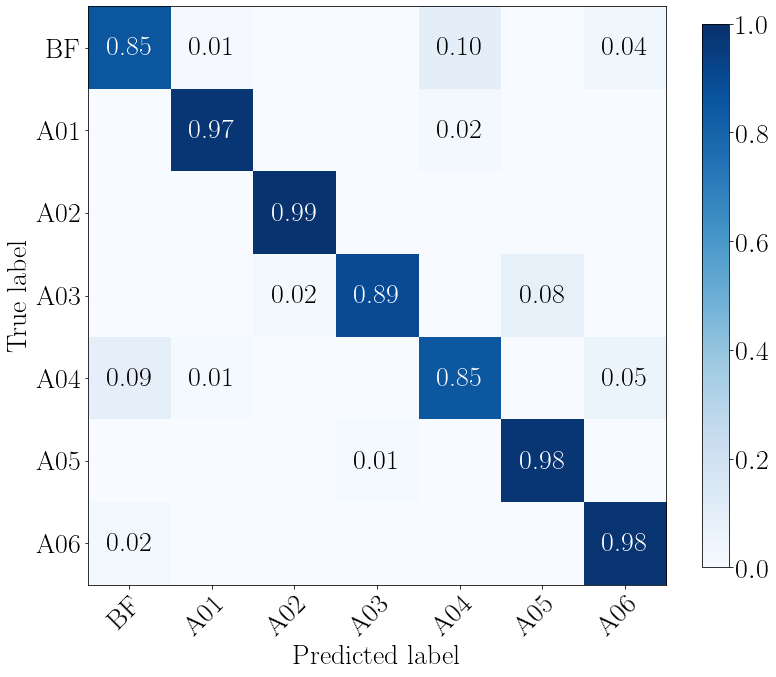

Normalized confusion matrix


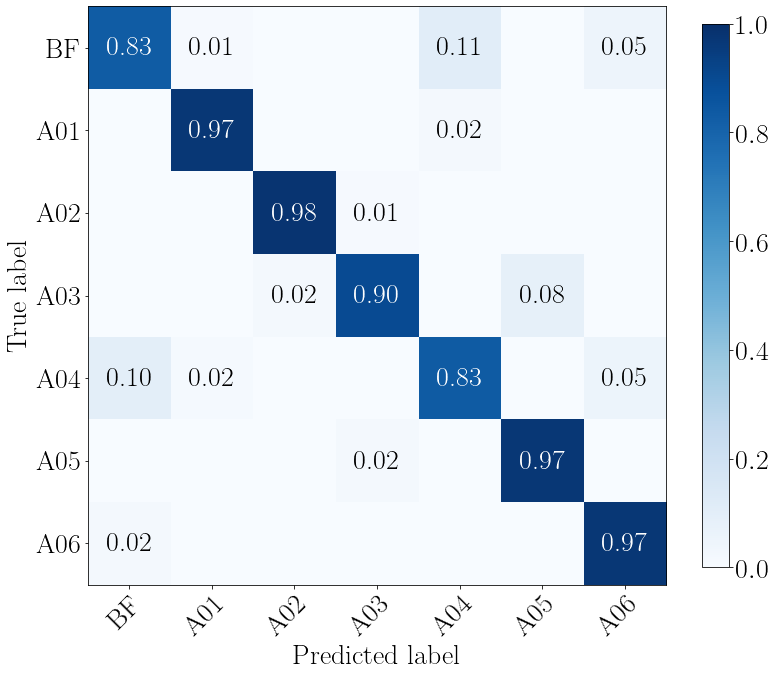

Normalized confusion matrix


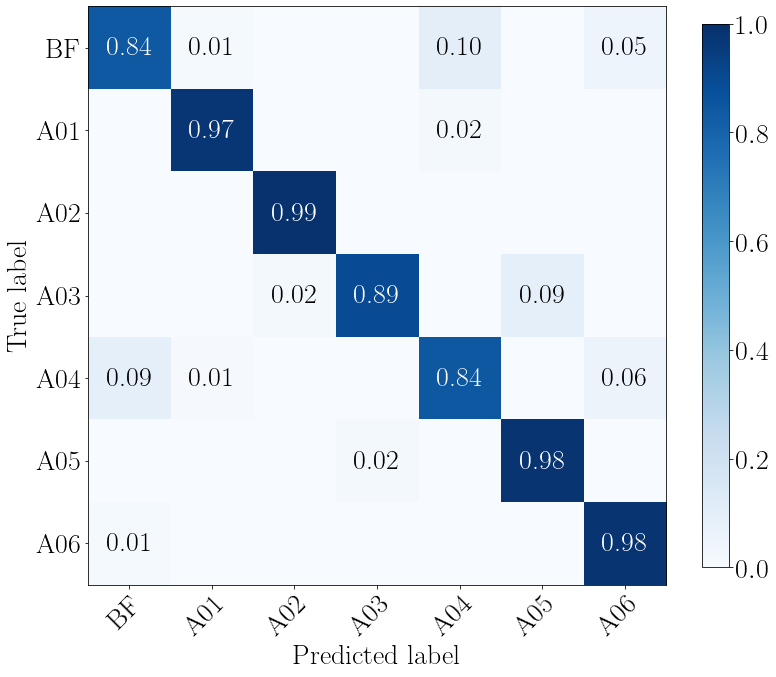

Normalized confusion matrix


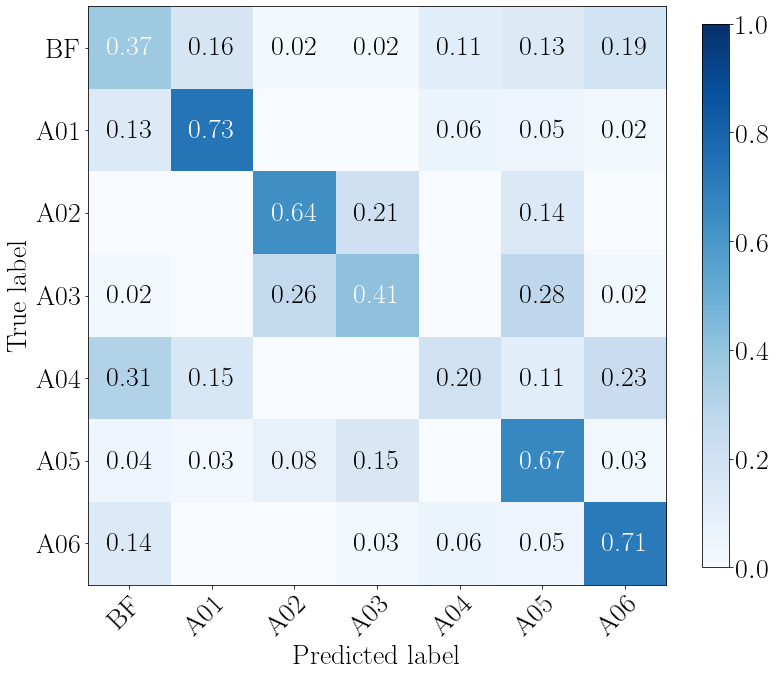

Normalized confusion matrix


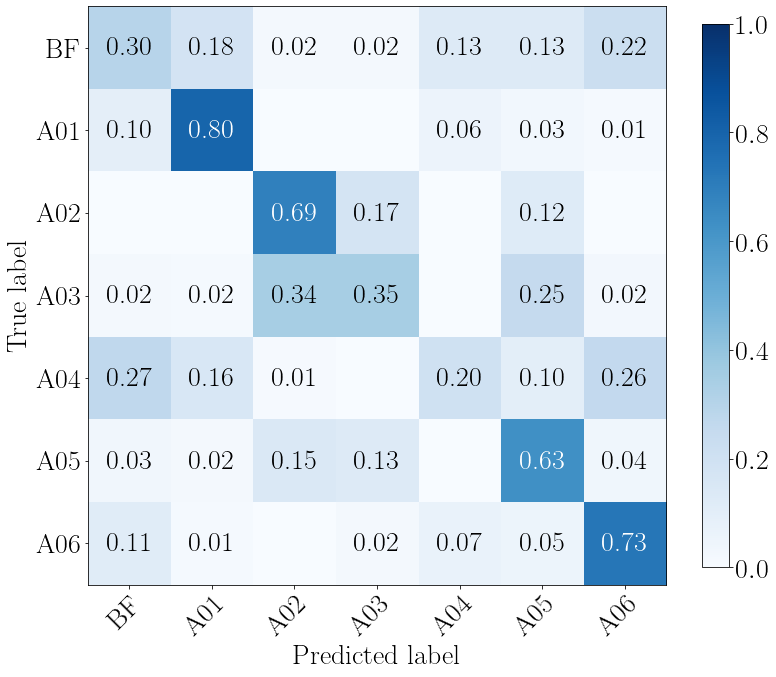

Normalized confusion matrix


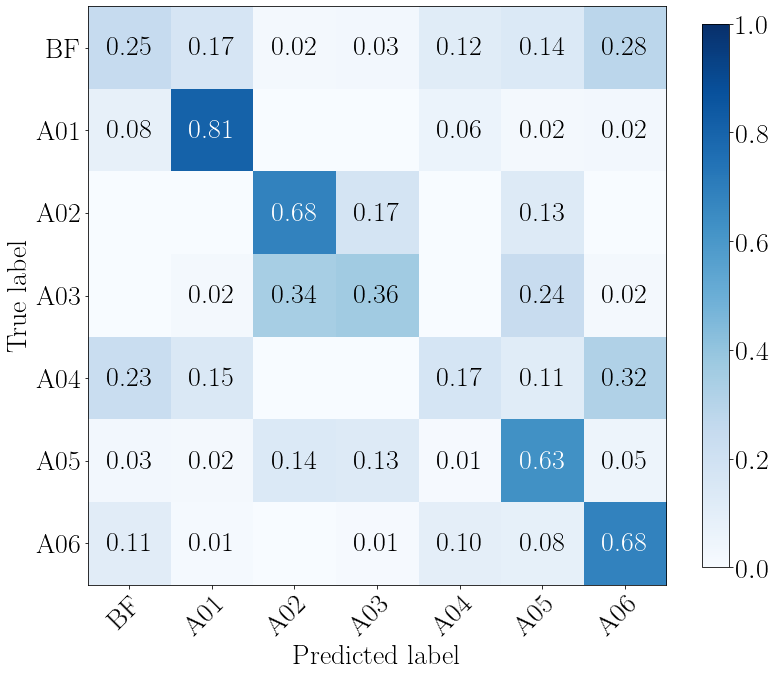

Normalized confusion matrix


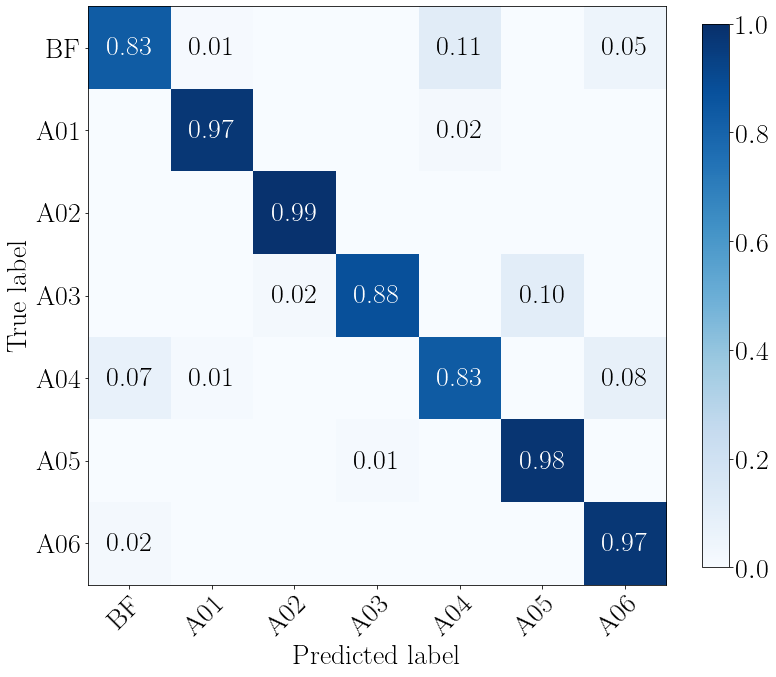

{'class__C': 1, 'class__decision_function_shape': 'ovo', 'class__kernel': 'linear'}
0.9214438414394701


In [16]:
for feat in selected_features_list:
    if feat == ['lpc']:
        partial = results_df[([a == feat for a in results_df['selected_features']])
                                ]
        best_row = partial[partial.accuracy_eval == partial.accuracy_eval.max()]
        best_row.reset_index(inplace=True)
        best_row = best_row.iloc[0, :]
        x_labels = ['BF','A01', 'A02', 'A03', 'A04', 'A05', 'A06']
        y_labels = x_labels
        #plt.figure(figsize = (12,12))
        #plt.title("Feat {}".format(feat))

        #sns.heatmap(best_row['cm_eval'], annot=True, vmin=0, vmax=1)
        my_plot_confusion_matrix(best_row['cm_eval'], normalize=True, x_labels=x_labels, y_labels=y_labels)
        
        plt.savefig("figures/multi_traindev_feat_{}_NFFT_{}_hopsize_{}.png".format(feat, nfft, hop_size))
        plt.show()

        
        plt.show()
        print(best_row['model_params'])
        print(best_row['accuracy_eval'])

    else:
    
        for fft_params in zip(nfft_list, hop_size_list):
            nfft = fft_params[0]
            hop_size = fft_params[1]
            partial = results_df[(results_df['nfft']==nfft) &
                                 ([a == feat for a in results_df['selected_features']])
                                ]
            best_row = partial[partial.accuracy_eval == partial.accuracy_eval.max()].squeeze()


    
            #plt.figure(figsize = (12,12))
            #plt.title("Feat {} NFFT {} Hop Size {}".format(feat, nfft, hop_size))

            #sns.heatmap(best_row['cm_eval'], annot=True, vmin=0, vmax=1)
            x_labels = ['BF','A01', 'A02', 'A03', 'A04', 'A05', 'A06']
            y_labels = x_labels
            my_plot_confusion_matrix(best_row['cm_eval'], normalize=True, x_labels=x_labels, y_labels=y_labels)

            plt.savefig("figures/multi_traindev_feat_{}_NFFT_{}_hopsize_{}.png".format(feat, nfft, hop_size))
            plt.show()

            #print(best_row['model_params'])
            #print(best_row['accuracy_eval'])

